# NYC Real Estate Price Prediction Model

In [1]:
import pandas as pd
import numpy as np

In [559]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We have both categorical and numerical variables

replace column name space with another character

In [560]:
df.columns = df.columns.str.replace(' ', '_')

Drop unwanted columns

In [561]:
df = df.drop(['Unnamed:_0','EASE-MENT','BLOCK','LOT','ADDRESS','APARTMENT_NUMBER','ZIP_CODE','BUILDING_CLASS_AT_PRESENT','TAX_CLASS_AT_PRESENT','BUILDING_CLASS_CATEGORY'], axis =1)

here is the list of variables

In [562]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   RESIDENTIAL_UNITS               84548 non-null  int64 
 3   COMMERCIAL_UNITS                84548 non-null  int64 
 4   TOTAL_UNITS                     84548 non-null  int64 
 5   LAND_SQUARE_FEET                84548 non-null  object
 6   GROSS_SQUARE_FEET               84548 non-null  object
 7   YEAR_BUILT                      84548 non-null  int64 
 8   TAX_CLASS_AT_TIME_OF_SALE       84548 non-null  int64 
 9   BUILDING_CLASS_AT_TIME_OF_SALE  84548 non-null  object
 10  SALE_PRICE                      84548 non-null  object
 11  SALE_DATE                       84548 non-null  object
dtypes: int64(6), object(6)
memory usage: 7.7+ MB


LAND_SQUARE_FEET, GROSS_SQUARE_FEET and SALE_PRICE has object type but they are actually numerical variables

Investigate for non numeric values

In [564]:
X = df['LAND_SQUARE_FEET'].str.isnumeric()
Y = df['GROSS_SQUARE_FEET'].str.isnumeric()
Z = df['SALE_PRICE'].str.isnumeric()

In [565]:
print(df[~X]['LAND_SQUARE_FEET'].nunique())
print(df[~Y]['GROSS_SQUARE_FEET'].nunique())
print(df[~Z]['SALE_PRICE'].nunique())

1
1
1


In [566]:
print(np.unique(df[~X].iloc[:,5]))
print(np.unique(df[~Y].iloc[:,6]))
print(np.unique(df[~Z].iloc[:,10]))

[' -  ']
[' -  ']
[' -  ']


Because of '-' they are object type variables. Turn these variables to numerical type

In [567]:
numeric = ['LAND_SQUARE_FEET','GROSS_SQUARE_FEET','SALE_PRICE']

df[numeric] = df[numeric].apply(pd.to_numeric, errors = 'coerce')

Split Sale Date to create year column

In [568]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], errors='coerce')

In [569]:
df['SALE_YEAR'] = pd.DatetimeIndex(df['SALE_DATE']).year

In [570]:
df = df.drop('SALE_DATE', axis =1)

Drop all rows with missing sales prices

In [571]:
df = df.dropna(subset=['SALE_PRICE'])

In [572]:
df_null = df[df['SALE_PRICE'].isin([np.nan,np.inf,-np.inf])]

In [573]:
df_null

,BOROUGH,NEIGHBORHOOD,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR


In [574]:
df['SALE_PRICE'].isnull().sum()

0

Analyze data

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

In [576]:
df.describe()

,BOROUGH,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR
count,69987.000000,69987.000000,69987.000000,69987.000000,4.879900e+04,4.824800e+04,69987.000000,69987.000000,6.998700e+04,69987.000000
mean,2.921928,1.899553,0.172489,2.092203,3.629395e+03,3.672552e+03,1799.348236,1.641976,1.276456e+06,2016.655065
std,1.235688,14.549545,9.123717,17.276100,4.035784e+04,2.947540e+04,520.884552,0.771162,1.140526e+07,0.475351
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00,2016.000000
25%,2.000000,0.000000,0.000000,0.000000,1.438000e+03,8.280000e+02,1920.000000,1.000000,2.250000e+05,2016.000000
50%,3.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1937.000000,2.000000,5.300000e+05,2017.000000
75%,4.000000,2.000000,0.000000,2.000000,3.100000e+03,2.520000e+03,1965.000000,2.000000,9.500000e+05,2017.000000
max,5.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,2017.000000


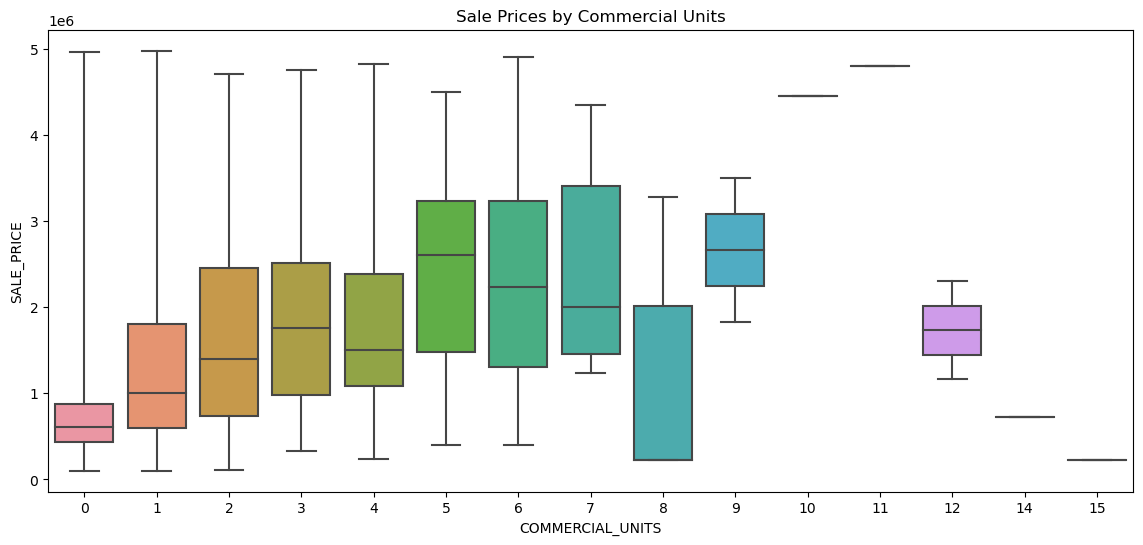

In [577]:
#plt.hist(df['COMMERCIAL_UNITS'].dropna(),bins =100)
#df['COMMERCIAL_UNITS'].hist()
#plt.plot(df['COMMERCIAL_UNITS'],df['SALE_PRICE'],'o',alpha =0.02, markersize =1)
#plt.axis([0,50000,0,5000000000])


data = df.dropna(subset = ['SALE_PRICE','COMMERCIAL_UNITS'])
data = data[(data['COMMERCIAL_UNITS']<20)&
           (data['SALE_PRICE']<5000000)&
           (data['SALE_PRICE']>100000)&
           (data['GROSS_SQUARE_FEET']>0)]

plt.figure(figsize=(14,6))

sns.boxplot(x ='COMMERCIAL_UNITS',y='SALE_PRICE',data =data, whis=10)
plt.title('Sale Prices by Commercial Units');
plt.show()

In [ ]:
Scatter plot olarak commercial vs sale price bakilabilir
Commercial lari 100 lik gruplara bolup categorical olarak bakilabilir.

Eliminate the data with sale price is below 0 and year built is 0

In [578]:
df = df[df['SALE_PRICE']>0]

In [579]:
df = df[df['YEAR_BUILT'] != 0]

Find the outliers for Gross Square Feet and LAND_SQUARE_FEET

Remove outliers of GROSS_SQUARE_FEET and LAND_SQUARE_FEET based on using +/- 3 std deviation

In [580]:
gsf_mean = df['GROSS_SQUARE_FEET'].mean()
gsf_std = df['GROSS_SQUARE_FEET'].std()

gsf_cutoff = gsf_std * 3

gsf_upper_threshold, gsf_lower_threshold = gsf_mean + gsf_cutoff, gsf_mean - gsf_cutoff

df = df[(df['GROSS_SQUARE_FEET']> gsf_lower_threshold) & (df['GROSS_SQUARE_FEET']< gsf_upper_threshold)]
df = df[df['GROSS_SQUARE_FEET']!= 0]

In [581]:
lsf_mean = df['LAND_SQUARE_FEET'].mean()
lsf_std = df['LAND_SQUARE_FEET'].std()

lsf_cutoff = lsf_std * 3

lsf_upper_threshold, lsf_lower_threshold = lsf_mean + lsf_cutoff, lsf_mean - lsf_cutoff

df = df[(df['LAND_SQUARE_FEET']> lsf_lower_threshold) & (df['LAND_SQUARE_FEET']< lsf_upper_threshold)]
df = df[df['LAND_SQUARE_FEET']!= 0]

In [582]:
print(gsf_mean,gsf_std,gsf_cutoff,gsf_upper_threshold,gsf_lower_threshold )

3753.2706070905524 30820.11153688261 92460.33461064783 96213.60521773838 -88707.06400355727


Remove RESIDENTIAL_UNITS and COMMERCIAL_UNITS and keep TOTAL_UNITS to prevent multicollinearity

In [583]:
#df = df[df['TOTAL_UNITS'] == df['RESIDENTIAL_UNITS'] + df['COMMERCIAL_UNITS']]
#df = df.drop(['RESIDENTIAL_UNITS','COMMERCIAL_UNITS'], axis = 1)

Remove unexpected values from the total units

In [584]:
df = df[(df['TOTAL_UNITS'] > 0) & (df['TOTAL_UNITS'] != 2261)]

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29016 entries, 0 to 84547
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         29016 non-null  int64  
 1   NEIGHBORHOOD                    29016 non-null  object 
 2   TOTAL_UNITS                     29016 non-null  int64  
 3   LAND_SQUARE_FEET                29016 non-null  float64
 4   GROSS_SQUARE_FEET               29016 non-null  float64
 5   YEAR_BUILT                      29016 non-null  int64  
 6   TAX_CLASS_AT_TIME_OF_SALE       29016 non-null  int64  
 7   BUILDING_CLASS_AT_TIME_OF_SALE  29016 non-null  object 
 8   SALE_PRICE                      29016 non-null  float64
 9   SALE_YEAR                       29016 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.4+ MB


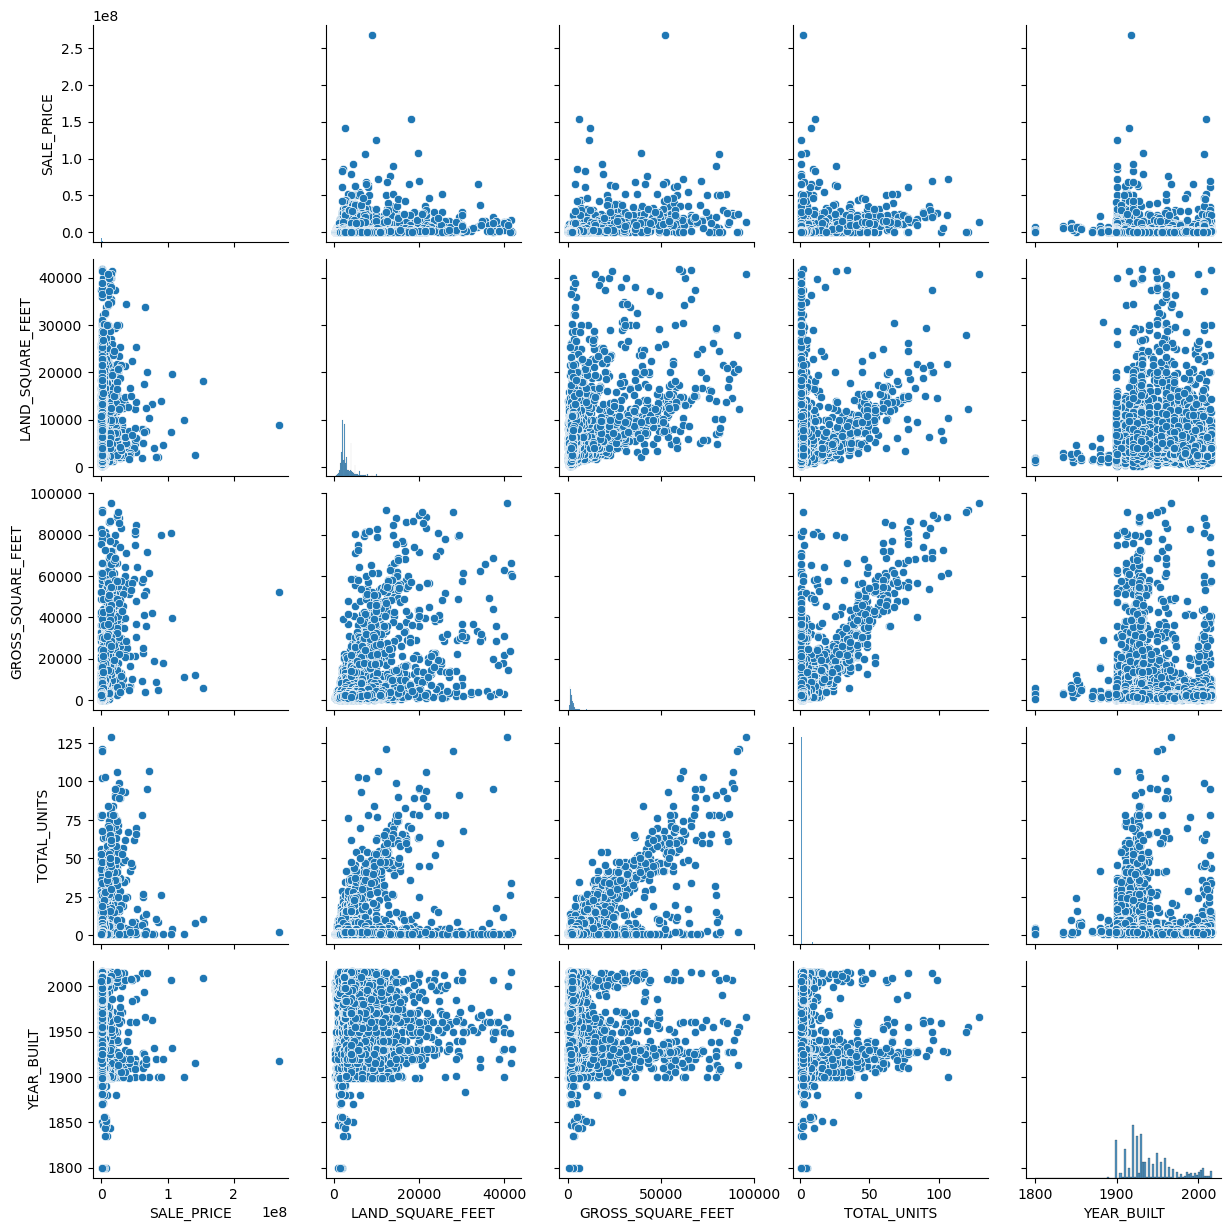

In [586]:
import seaborn as sns
#sns.pairplot(df,hue='SALE_PRICE',palette='husl')
sns.pairplot(df,vars = ['SALE_PRICE','LAND_SQUARE_FEET','GROSS_SQUARE_FEET','TOTAL_UNITS','YEAR_BUILT'],palette='husl')

In [524]:
df.shape

(36434, 12)

In [424]:
df.describe()

,BOROUGH,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR
count,29256.000000,29256.000000,2.925600e+04,2.925600e+04,29256.000000,29256.000000,2.925600e+04,29256.000000
mean,3.535001,3.302092,4.218604e+03,4.604540e+03,1940.701326,1.227851,1.635004e+06,2016.644893
std,1.019552,20.755884,3.555187e+04,3.414277e+04,30.534471,0.684250,1.701284e+07,0.478554
min,1.000000,1.000000,2.000000e+02,1.200000e+02,1800.000000,1.000000,1.000000e+00,2016.000000
25%,3.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,1.000000,4.200000e+05,2016.000000
50%,4.000000,2.000000,2.500000e+03,1.872000e+03,1930.000000,1.000000,6.200000e+05,2017.000000
75%,4.000000,2.000000,4.000000e+03,2.670250e+03,1960.000000,1.000000,9.500000e+05,2017.000000
max,5.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,2017.000000


In [425]:
df.corr()

,BOROUGH,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR
BOROUGH,1.000000,-0.112436,0.007972,-0.110223,0.334011,-0.238193,-0.100414,-0.000902
TOTAL_UNITS,-0.112436,1.000000,0.501904,0.726862,-0.000799,0.115309,0.165581,-0.013578
LAND_SQUARE_FEET,0.007972,0.501904,1.000000,0.657898,0.027996,0.104461,0.041152,-0.003006
GROSS_SQUARE_FEET,-0.110223,0.726862,0.657898,1.000000,0.034838,0.203048,0.509091,-0.009926
YEAR_BUILT,0.334011,-0.000799,0.027996,0.034838,1.000000,-0.016562,0.001177,-0.014564
TAX_CLASS_AT_TIME_OF_SALE,-0.238193,0.115309,0.104461,0.203048,-0.016562,1.000000,0.154412,-0.013869
SALE_PRICE,-0.100414,0.165581,0.041152,0.509091,0.001177,0.154412,1.000000,-0.003312
SALE_YEAR,-0.000902,-0.013578,-0.003006,-0.009926,-0.014564,-0.013869,-0.003312,1.000000


# Creating Pipeline

Creating pipelines to transform numeric and non numeric variables

In [613]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29256 entries, 0 to 84547
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         29256 non-null  int64  
 1   NEIGHBORHOOD                    29256 non-null  object 
 2   TOTAL_UNITS                     29256 non-null  int64  
 3   LAND_SQUARE_FEET                29256 non-null  float64
 4   GROSS_SQUARE_FEET               29256 non-null  float64
 5   YEAR_BUILT                      29256 non-null  int64  
 6   TAX_CLASS_AT_TIME_OF_SALE       29256 non-null  int64  
 7   BUILDING_CLASS_AT_TIME_OF_SALE  29256 non-null  object 
 8   SALE_PRICE                      29256 non-null  float64
 9   SALE_YEAR                       29256 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.5+ MB


Creating Pipelines for Numeric and Categorical Features 
1. Impute
2. Scale
3. OneHotEncoder


In [643]:
steps_num = [('imputer',SimpleImputer(missing_values = np.nan, strategy='mean')),
             ('scaler', StandardScaler())]
steps_cat = [('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]
              
numeric_transformer = Pipeline(steps = steps_num)
categorical_transformer = Pipeline(steps = steps_cat)

numeric_features = ['TOTAL_UNITS','LAND_SQUARE_FEET','GROSS_SQUARE_FEET']#,'YEAR_BUILT','SALE_YEAR']
categorical_features = ['BOROUGH','NEIGHBORHOOD']#,'TAX_CLASS_AT_TIME_OF_SALE','BUILDING_CLASS_AT_TIME_OF_SALE']  


In [644]:
preprocessor = ColumnTransformer(transformers = [('num',numeric_transformer,numeric_features),
                                                 ('cat',categorical_transformer,categorical_features)])


Test LinearRegression model

In [645]:
reg = Pipeline(steps = [('preprocessor',preprocessor),
                       ('regressor',LinearRegression())])

In [646]:
y = df.SALE_PRICE
X = df.drop('SALE_PRICE', axis =1)

In [647]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state =42)

In [648]:
clf = reg.fit(X_train,y_train)

In [649]:
y_pred = reg.predict(X_test)
print(reg.predict(X_test))


[1516153.3951369   598672.10153678 1417792.93678017 ...  722785.41510955
  372256.64297564  346690.39113103]


In [650]:
#X.iloc[0,:]
#print(X[0])

In [656]:
np.array(X.iloc[3,:])

array([1, 'ALPHABET CITY', 8, 1750.0, 4226.0, 1920, 2, 'C4', 2016],
      dtype=object)

In [660]:
col = X.columns
#print(X.head())
print(col)
y_new = pd.DataFrame(data = list(X.iloc[3,:]),columns = col)
y_new.head()
#y_new = np.array([[5,1000,1200,'1','ALPHABET CITY']])


Index(['BOROUGH', 'NEIGHBORHOOD', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_YEAR'],
      dtype='object')


ValueError: Shape of passed values is (9, 1), indices imply (9, 9)

In [658]:
reg.predict(y_new)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by SimpleImputer.

Calculate loss function

In [608]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4359211.329901685


training performance is not stable??

In [609]:
cv_results = cross_val_score(reg,X_train, y_train, scoring='r2', cv=5)
cv_results

array([0.52613661, 0.37985254, 0.36580666, 0.39566395, 0.40482297])

In [623]:
cv_results = cross_val_score(reg,X_test, y_test, scoring='r2', cv=5)
cv_results

array([0.20426409, 0.55153663, 0.31207051, 0.06804953, 0.16572191])

In [661]:
np.mean(cv_results)

0.2603285334554196

Test KneighborClassifier

In [614]:
clfpipe = Pipeline(steps = [('preprocessor',preprocessor),
                       ('clf',KNeighborsRegressor(n_neighbors =3))])

In [615]:
clfpipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TOTAL_UNITS',
                                                   'LAND_SQUARE_FEET',
                                                   'GROSS_SQUARE_FEET']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BOROUGH',
                                                   'NEIGHBORHOOD'])])),
                ('clf', KNeighborsRegressor(n_neighbors=3))])

In [616]:
clfpipe.predict(X_test)

array([1848333.33333333,  519666.66666667, 1578333.33333333, ...,
        921666.66666667,  428242.        ,  418333.33333333])

In [617]:
clfpipe.score(X_test,y_test)

0.3287024139665412

In [618]:
preprocessor.transformers_[0][1][0]

SimpleImputer()

Used a lot of resources to calculate

In [619]:
param_grid = {'preprocessor__num__imputer__strategy':['mean','median'],
              'clf__n_neighbors':np.arange(1,5,2)}

In [620]:
#param_grid = {'clf__n_neighbors':np.arange(1,5,2)}

In [621]:
grid_search = GridSearchCV(clfpipe,param_grid,scoring ='accuracy', cv=5)

In [622]:
grid_search.fit(X_train,y_train)

/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklear

/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TOTAL_UNITS',
                                                                          'LAND_SQUARE_FEET',
                                                                          'GROSS_SQUARE_FEET']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['BOROUGH',
                                                                          'NEIGHBORHOOD'])])),
                                       ('clf',
                                        KNeighborsRegressor(n_neighbors=3))]),
             param_grid={'clf__n_neighbors': array([1, 3]),
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             scoring='accuracy')

In [473]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TOTAL_UNITS',
                                                   'LAND_SQUARE_FEET',
                                                   'GROSS_SQUARE_FEET',
                                                   'YEAR_BUILT', 'SALE_YEAR']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BOROUGH', 'NEIGHBORHOOD',
                                                   'TAX_CLASS_AT_TIME_OF_SALE',
                                                   'BUILDING_CLASS_AT_TIME_OF_SALE'])])),
                ('clf', KNeighborsClassifier(n_neighbors=1))])

In [474]:
grid_search.best_score_

0.02006928943452381